# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🫀 Heart 🫀</p>

<img src="https://www.heartfoundation.org.au/getmedia/381d8cbb-a33c-4024-83b1-8d8a03e6bd70/Heart-health-checks-image.jpg">

<!-- <img src="https://cdn.dribbble.com/users/223902/screenshots/1772418/dribbble.jpg?compress=1&resize=800x600&vertical=top">

<img src="https://cdn.dribbble.com/users/1209618/screenshots/3000481/media/2c83cb04193be0215eb94f62429b1a70.gif"> -->

<b> Context </b>


1. **`age`:** Age of the patient in years.
2. **`sex`:** Gender of the patient (1 = male, 0 = female).
3. **`cp`:** Chest pain type. It has four categories:
   - 0: Typical angina
   - 1: Atypical angina
   - 2: Non-anginal pain
   - 3: Asymptomatic
4. **`trestbps`:** Resting blood pressure in mm Hg.
5. **`chol`:** Serum cholesterol in mg/dl.
6. **`fbs`:** Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false).
7. **`restecg`:** Resting electrocardiographic results:
   - 0: Normal
   - 1: Having ST-T wave abnormality
   - 2: Showing probable or definite left ventricular hypertrophy
8. **`thalach`:** Maximum heart rate achieved during a stress test.
9. **`exang`:** Exercise-induced angina (1 = yes, 0 = no).
10. **`oldpeak`:** ST depression induced by exercise relative to rest.
11. **`slope`:** Slope of the peak exercise ST segment:
   - 0: Upsloping
   - 1: Flat
   - 2: Downsloping
12. **`ca`:** Number of major vessels (0-3) colored by fluoroscopy.
13. **`thal`:** Thalium stress test result:
   - 0: Normal
   - 1: Fixed defect
   - 2: Reversible defect
14. **`target`:** Heart disease status (0 = no disease, 1 = presence of disease).

These features provide a comprehensive overview of a patient's heart health, combining demographic information, physical measurements, and medical test results. The goal is to use these features to predict whether a patient has heart disease (`target` = 1) or not (`target` = 0).
I

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. Data Overview](#3)

* [4. EDA](#4)
        
* [5. Preprocessing](#5) 

* [6. SPLITING DATA](#6) 

* [7. Scaling](#7) 
   
* [8. MODELS](#8)

<!-- * [9. SUMMRY](#9)
  -->
* [9. END](#10)
    
    

<a id="1"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📚 IMPORTING LIBRARIES</p>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set style of seaborn plots
sns.set_style('darkgrid')

# Palette
palette = sns.color_palette('plasma')

<a id="2"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📖 LOADING DATA</p>

In [3]:
df = pd.read_csv('/kaggle/input/heartcsv/heart.csv')

<a id="3"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🧐 Data Overview</p>

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<div class="alert alert-block alert-info ;"> 📌  We do not have any null or missing data 🥳 </div>

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Markdown
<a id="4"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📊 EDA</p>


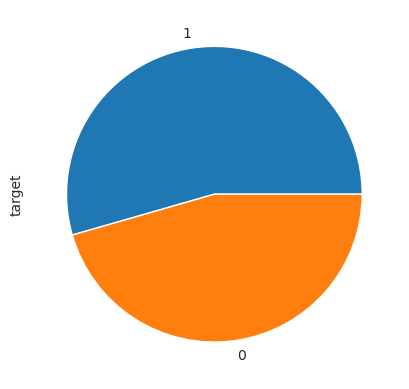

In [9]:
df['target'].value_counts().plot(kind='pie');

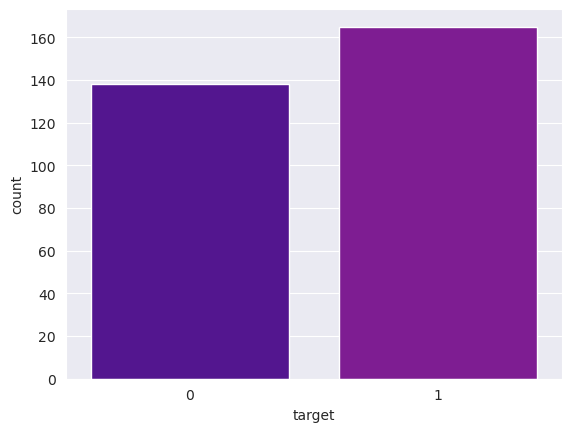

In [10]:
sns.countplot(data = df , x='target' , palette=palette);

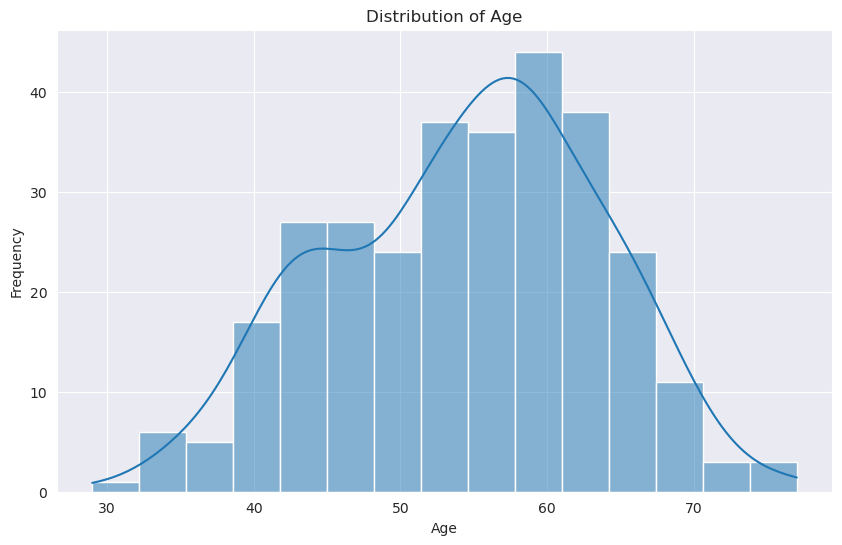

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=15, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



<img src="https://staffblogs.le.ac.uk/bayeswithstata/files/2014/05/mixture.png">
mixture normal distribution

<div class="alert alert-block alert-info ;"> 
    The above diagram shows the counter. It can be seen that most of the patients are between 50 and 60 years old. </div>

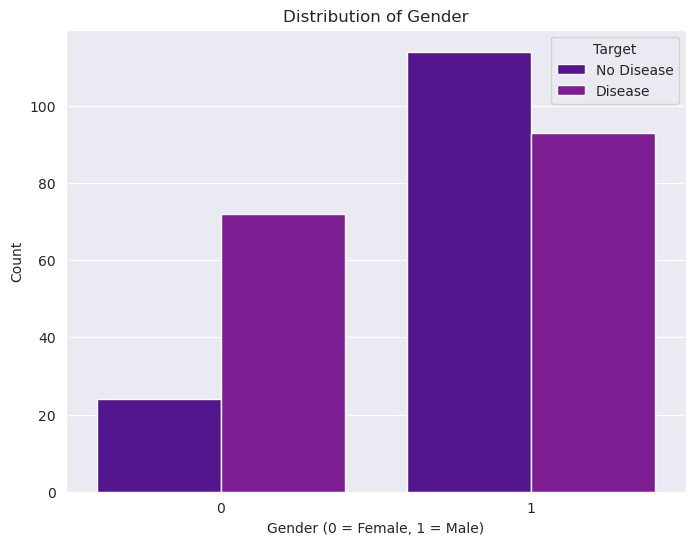

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='target' , palette=palette)
plt.title('Distribution of Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()

<div class="alert alert-block alert-info ;"> 
    
The graph above shows the gender distribution among patients, broken down by the presence or absence of heart disease. It can be seen that:
 
<br>
There are more men in the data.
<br>

Heart disease is much more common in men than women. </div>

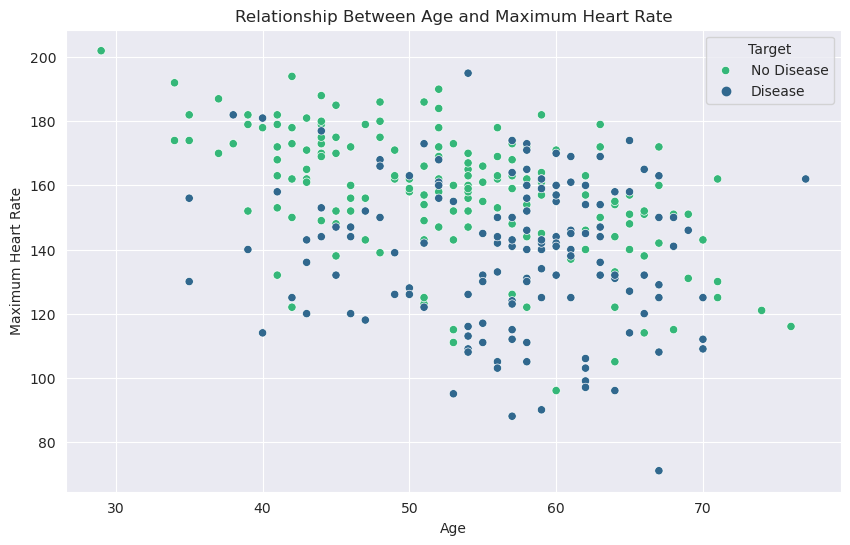

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette='viridis')
plt.title('Relationship Between Age and Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()


<div class="alert alert-block alert-info ;"> 
The graph above shows the relationship between age and maximum heart rate, broken down by the presence or absence of heart disease. The following results can be extracted from the graph:
<br>
Patients with heart disease usually have a higher maximum heart rate.
<br>
Also, it is observed that the maximum heart rate decreases with age. 
</div>

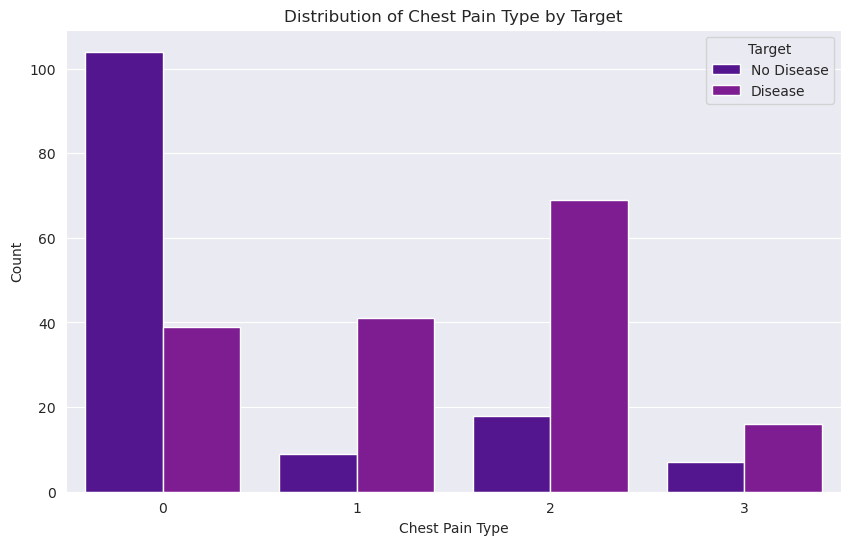

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp', hue='target', palette=palette)
plt.title('Distribution of Chest Pain Type by Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()


<div class="alert alert-block alert-info ;"> 
The graph above shows the relationship between the type of chest pain (cp) and the presence or absence of heart disease:
<br>
<br>

Type 0 pain (Typical angina) is often associated with the absence of heart disease.
<br>
While type 1 (Atypical angina), type 2 (Non-anginal pain), and type 3 (Asymptomatic) pains are more associated with heart disease.
</div>

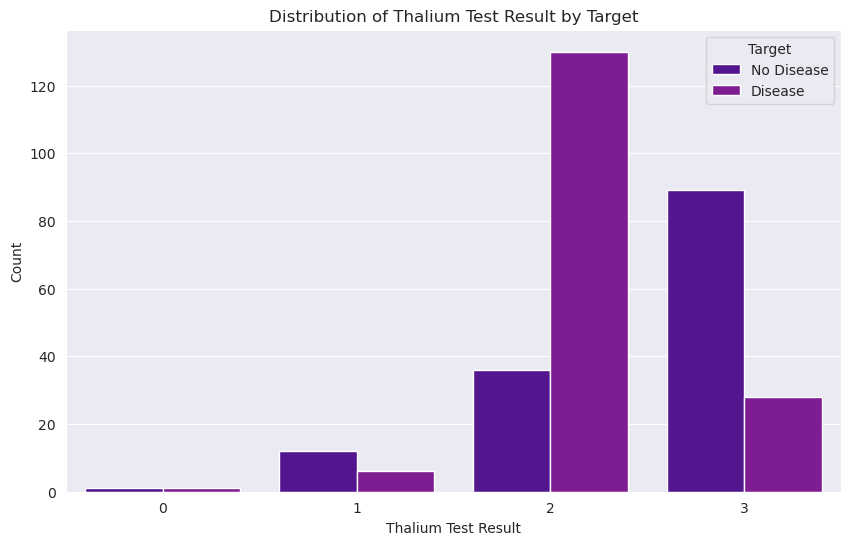

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='thal', hue='target', palette=palette)
plt.title('Distribution of Thalium Test Result by Target')
plt.xlabel('Thalium Test Result')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.show()


In [16]:
thal_values_count = df['thal'].value_counts()
thal_values_count

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

<div class="alert alert-block alert-info ;"> 
The graph above shows the relationship between the thallium test result and the presence or absence of heart disease:
<br>
<br>
Patients with thallium test result of 2 (reversible defect) are more at risk of heart disease.
<br>
While patients with a result of 1 (Fixed defect) or 3 (Normal) are less at risk. 
</div>

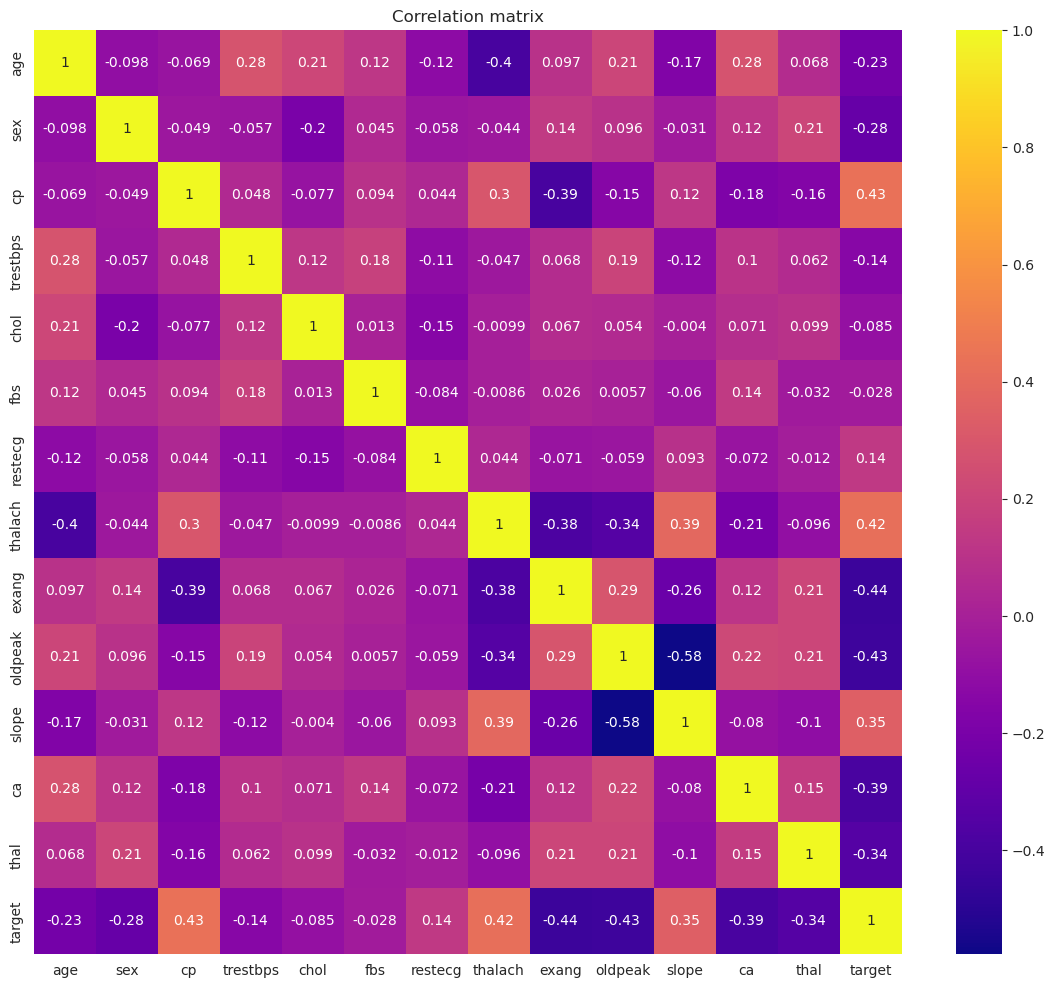

In [17]:
# محاسبه ماتریس همبستگی
correlation = df.corr()

cols = df.columns

# محاسبه ماتریس همبستگی برای ستون‌های انتخاب شده
corr_matrix = df[cols].corr()

# ایجاد نمودار گرمایی از ماتریس همبستگی
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title(f'Correlation matrix')
plt.show()


<a id="5"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🧹 Preprocessing </p>

# Outliers

In [18]:
numerical_features = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca']

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age          0
sex          0
trestbps     9
chol         5
fbs         45
thalach      1
exang        0
oldpeak      5
ca          25
dtype: int64

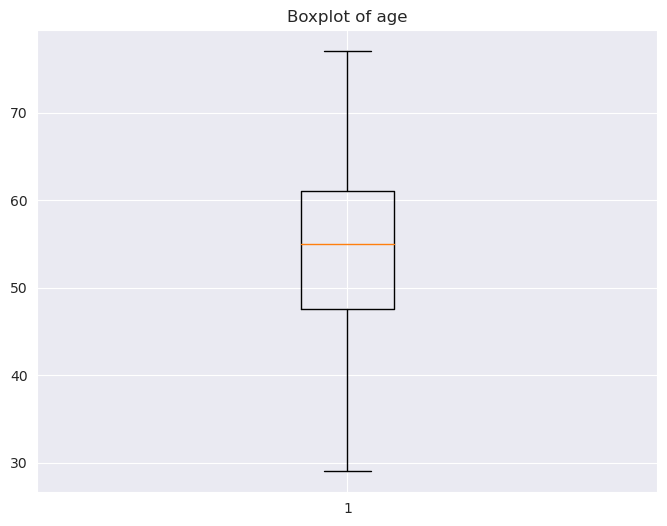

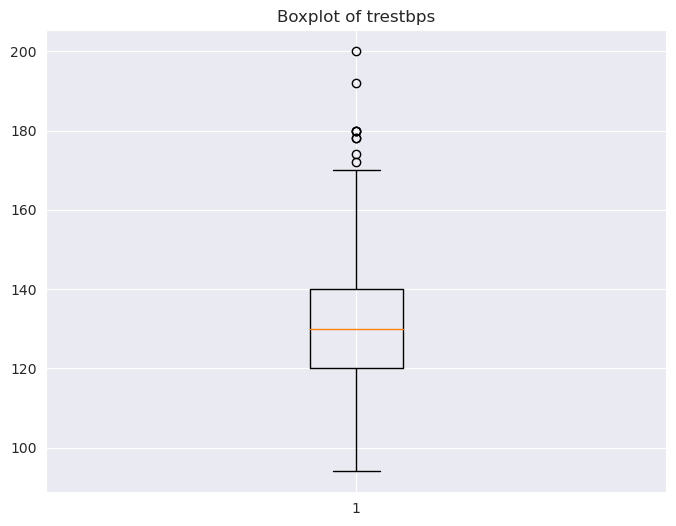

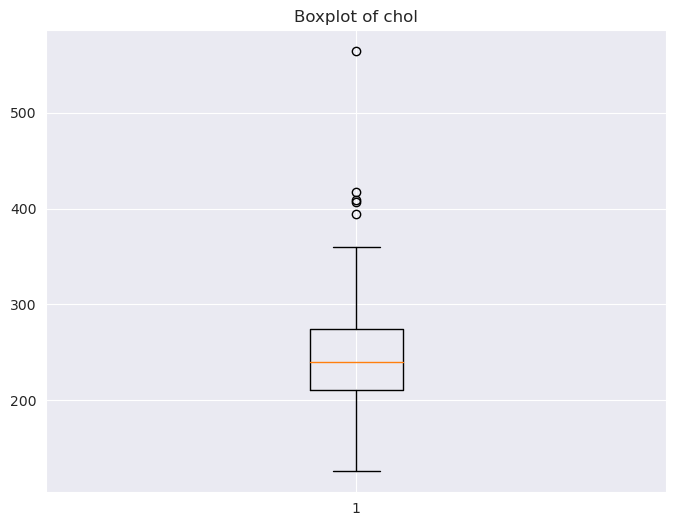

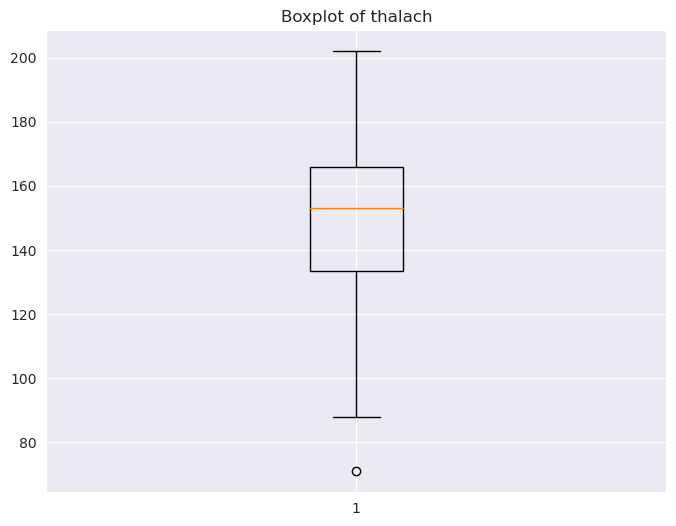

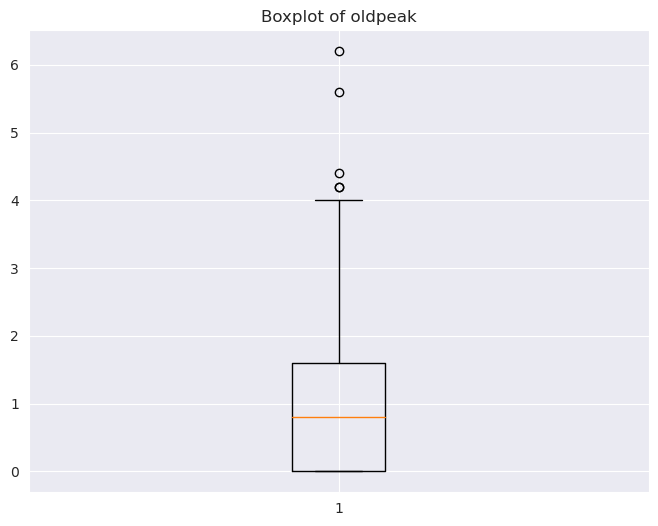

In [19]:

# Detect and visualize outliers using Boxplot
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in num_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [20]:
# # Calculate IQR (Interquartile Range) for outlier detection
# Q1 = df[num_features].quantile(0.25)
# Q3 = df[num_features].quantile(0.75)
# IQR = Q3 - Q1

# # Define threshold for identifying outliers
# threshold = 1.5

# # Detect and handle outliers
# outliers = (df[num_features] < (Q1 - threshold * IQR)) | (df[num_features] > (Q3 + threshold * IQR))
# df = df[~outliers.any(axis=1)]

# OHE

In [21]:
categorical_features = ['cp', 'slope', 'thal' , 'restecg']


In [22]:
df[categorical_features] = pd.get_dummies(df[categorical_features] , drop_first=True)

<a id="6"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">✂️ SPLITING DATA</p>

In [23]:
X = df.drop('target' , axis=1)
y = df['target']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split (X , y , test_size=0.3 , random_state=101)


<a id="7"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📐 Scaling</p>


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id="8"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">💡 MODELS</p>


# 1️⃣ DecisionTree 🌲🪵

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [30]:
dt_model.fit(X_train , y_train)

DecisionTreeClassifier()

## 🔎  Predict Dt

In [31]:
y_pred_dt = dt_model.predict(X_test)

## 🧮  Evaluating Dt

In [32]:
from sklearn.metrics import f1_score , classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76        44
           1       0.75      0.94      0.83        47

    accuracy                           0.80        91
   macro avg       0.83      0.80      0.80        91
weighted avg       0.82      0.80      0.80        91



In [33]:
dt_f1 = f1_score(y_test, y_pred_dt)
print("Decision Tree F1 score: {:.3f}".format(dt_f1))

Decision Tree F1 score: 0.830


## 🪄🪄 Grid Search Dt

In [34]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer, recall_score

model = DecisionTreeClassifier()

# Define the hyperparameter grid for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


recall_scorer = make_scorer(recall_score, pos_label=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring=recall_scorer, cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
print("Best Parameters:", best_params)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        44
           1       0.84      0.89      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



<hr>

# 2️⃣ RandomForest 🌲🌴🪵

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [36]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## 🔎  Predict Rf

In [37]:
y_pred_rf = dt_model.predict(X_test)

## 🧮  Evaluating Rf

In [38]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76        44
           1       0.75      0.94      0.83        47

    accuracy                           0.80        91
   macro avg       0.83      0.80      0.80        91
weighted avg       0.82      0.80      0.80        91



In [39]:
rf_f1 = f1_score(y_test, y_pred_rf)
print("Decision Tree F1 score: {:.3f}".format(dt_f1))

Decision Tree F1 score: 0.830


## 🪄🪄 Grid Search Rf

In [40]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the recall scorer
recall_scorer = make_scorer(recall_score, pos_label=1)

# Initialize GridSearchCV with recall scoring
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=recall_scorer, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Recall Score:", best_recall)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Recall Score: 0.8978260869565219


# 3️⃣ SVM

In [41]:
from sklearn.svm import SVC

svm_model = SVC(C=15, kernel='linear', random_state=3244)

In [42]:
svm_model.fit(X_train , y_train)

SVC(C=15, kernel='linear', random_state=3244)

## 🔎  Predict Svm

In [43]:
y_pred_svm = svm_model.predict(X_test)

## 🧮  Evaluating Svm

In [44]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85        44
           1       0.83      0.94      0.88        47

    accuracy                           0.87        91
   macro avg       0.88      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [45]:
svm_f1 = f1_score(y_test, y_pred_svm)
print("Decision Tree F1 score: {:.3f}".format(svm_f1))

Decision Tree F1 score: 0.880


# 4️⃣ xgboost

In [46]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
model = XGBClassifier()

# Define the hyperparameter grid for Grid Search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
print("Best Parameters:", best_params)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        44
           1       0.81      0.94      0.87        47

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.86        91
weighted avg       0.87      0.86      0.86        91



<a id="10"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">👋 END </p>

<p style="font-family:newtimeroman;color:clack;font-size:150%;text-align:center;border-radius:10px 10px;">I hope this netbook is useful for you. I am waiting for your support in the comments. I love you all 🤍🌱 </p>